In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def GD(f, grad_f, x0, alpha, maxit=1000, tolf=1e-6, tolx=1e-6):
    # initialize the infos
    f_val = np.zeros((maxit+1,))
    grad_norm = np.zeros((maxit+1,))

    # set the values for infos for x0
    f_val[0] = f(x0)
    grad_norm[0] = np.linalg.norm(grad_f(x0))
    xk = x0
    for k in range(maxit):
        x = xk - alpha * grad_f(xk)

        # Update the infos
        f_val[k+1] = f(x)
        grad_norm[k+1] = np.linalg.norm(grad_f(x))

        if grad_norm[k+1] <= tolf * grad_norm[0] or np.linalg.norm(x - xk) <= tolx:
            break
        xk = x
    
    # cut off exceeding values
    f_val = f_val[:k+1]
    grad_norm = grad_norm[:k+1]

    return x, k, f_val, grad_norm

In [3]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
    return alpha

In [4]:
def GD_backtracking(f, grad_f, x0, maxit=1000, tolf=1e-6, tolx=1e-6):
    # initialize the infos
    f_val = np.zeros((maxit+1,))
    grad_norm = np.zeros((maxit+1,))

    # set the values for infos for x0
    f_val[0] = f(x0)
    grad_norm[0] = np.linalg.norm(grad_f(x0))
    xk = x0
    for k in range(maxit):
        alpha = backtracking(f, grad_f, xk)
        x = xk - alpha * grad_f(xk)

        # Update the infos
        f_val[k+1] = f(x)
        grad_norm[k+1] = np.linalg.norm(grad_f(x))

        if grad_norm[k+1] <= tolf * grad_norm[0] or np.linalg.norm(x - xk) <= tolx:
            break
        xk = x
    
    # cut off exceeding values
    f_val = f_val[:k+1]
    grad_norm = grad_norm[:k+1]

    return x, k, f_val, grad_norm

The true solution is [3 1]
The computed solution is [2.99995427 0.99998476] with k = 548
The computed solution is [2.99999215 0.99999738] with k = 121
The computed solution is [2.99999378 0.99999793] with k = 97


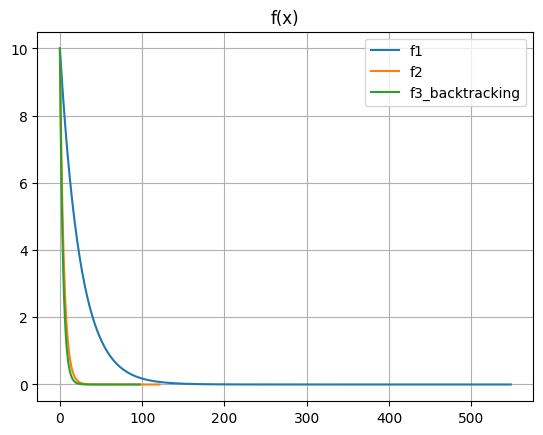

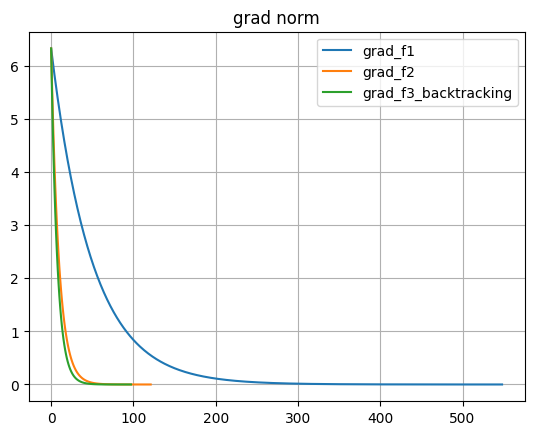

In [5]:
def f(x):
    x1 = x[0]
    x2 = x[1]

    return (x1 - 3)**2 + (x2 - 1)**2

def grad_f(x):
    x1 = x[0]
    x2 = x[1]

    return np.array([2 * (x1 - 3), 2*(x2-1)])

x0 = np.zeros((2,))

x_true = np.array([3, 1])
print(f'The true solution is {x_true}')

x_sol, k, f_val, grad_norm = GD(f, grad_f, x0, alpha=0.01)
print(f'The computed solution is {x_sol} with k = {k}')

x_sol2, k2, f_val2, grad_norm2 = GD(f, grad_f, x0, alpha=0.05)
print(f'The computed solution is {x_sol2} with k = {k2}')

x_sol3, k3, f_val3, grad_norm3 = GD_backtracking(f, grad_f, x0)
print(f'The computed solution is {x_sol3} with k = {k3}')

# plot f_val and grad_norm

plt.plot(f_val)
plt.plot(f_val2)
plt.plot(f_val3)
plt.title("f(x)")
plt.legend(['f1', 'f2', 'f3_backtracking'])
plt.grid()
plt.show()

plt.plot(grad_norm)
plt.plot(grad_norm2)
plt.plot(grad_norm3)
plt.title("grad norm")
plt.legend(['grad_f1', 'grad_f2', 'grad_f3_backtracking'])
plt.grid()
plt.show()

The true solution is [1 2]
The computed solution is [1.         1.99995148] with k = 525
The computed solution is [1.         1.99999016] with k = 115
The computed solution is [1.         1.99999033] with k = 96


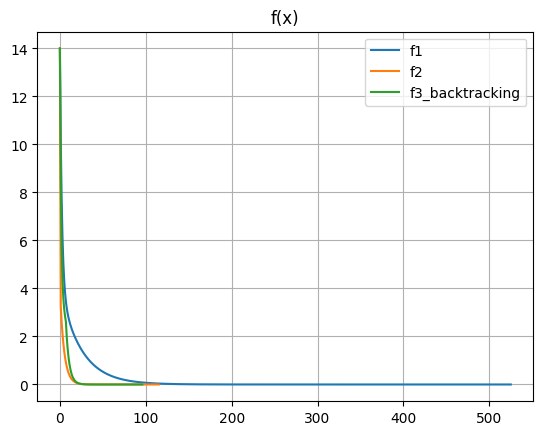

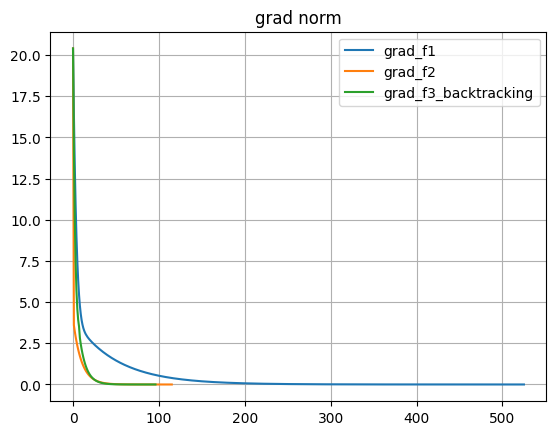

In [6]:
def f(x):
    x1 = x[0]
    x2 = x[1]

    return 10*(x1 - 1)**2 + (x2 - 2)**2

def grad_f(x):
    x1 = x[0]
    x2 = x[1]

    return np.array([20 * (x1 - 1), 2*(x2-2)])

x0 = np.zeros((2,))

x_true = np.array([1, 2])
print(f'The true solution is {x_true}')

x_sol, k, f_val, grad_norm = GD(f, grad_f, x0, alpha=0.01)
print(f'The computed solution is {x_sol} with k = {k}')

x_sol2, k2, f_val2, grad_norm2 = GD(f, grad_f, x0, alpha=0.05)
print(f'The computed solution is {x_sol2} with k = {k2}')

x_sol3, k3, f_val3, grad_norm3 = GD_backtracking(f, grad_f, x0)
print(f'The computed solution is {x_sol3} with k = {k3}')

# plot f_val and grad_norm

plt.plot(f_val)
plt.plot(f_val2)
plt.plot(f_val3)
plt.title("f(x)")
plt.legend(['f1', 'f2', 'f3_backtracking'])
plt.grid()
plt.show()

plt.plot(grad_norm)
plt.plot(grad_norm2)
plt.plot(grad_norm3)
plt.title("grad norm")
plt.legend(['grad_f1', 'grad_f2', 'grad_f3_backtracking'])
plt.grid()
plt.show()

The computed solution is [0.99398142 1.00371969] with k = 999
The computed solution is [0.9999564  1.00002695] with k = 453
The computed solution is [0.99999333 1.00000432] with k = 57


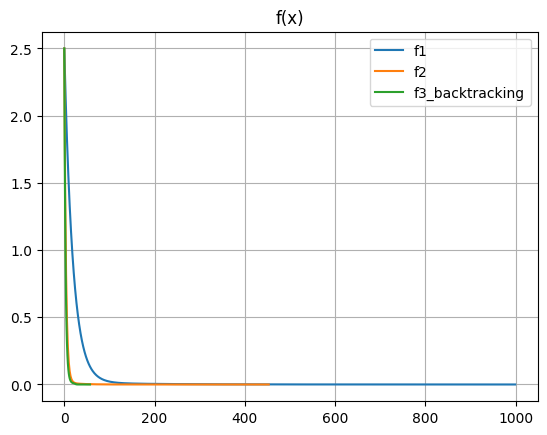

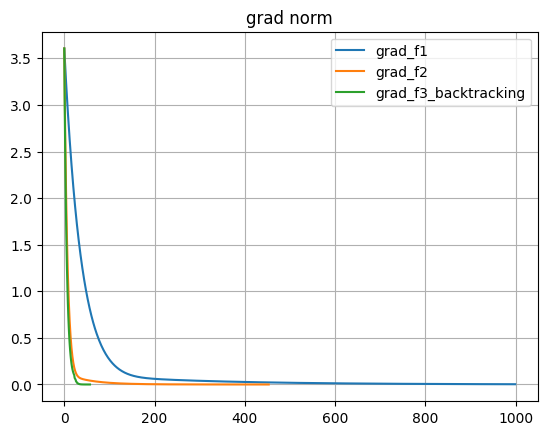

The computed solution is [0.97066523 0.9984936  1.03399294 0.99327705] with k = 999
The computed solution is [0.99482653 1.00279101 1.0026882  0.99928473] with k = 999
The computed solution is [0.99776085 1.00318871 0.99901948 0.99999696] with k = 342


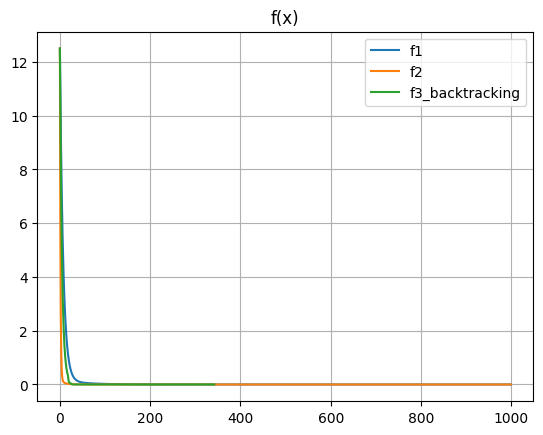

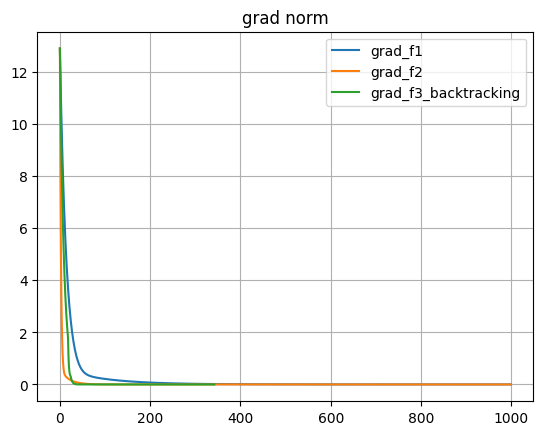

The computed solution is [0.97643373 0.99014903 1.00460001 1.01631533 1.01434966 0.99340473] with k = 999
The computed solution is [0.99280721 0.99997301 1.00579003 1.00664901 0.99402939 1.00051511] with k = 999
The computed solution is [0.9962097  1.00026931 1.00311444 1.00287959 0.99715265 1.00025346] with k = 765


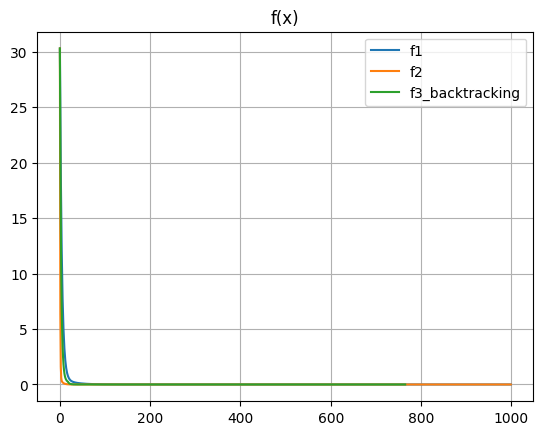

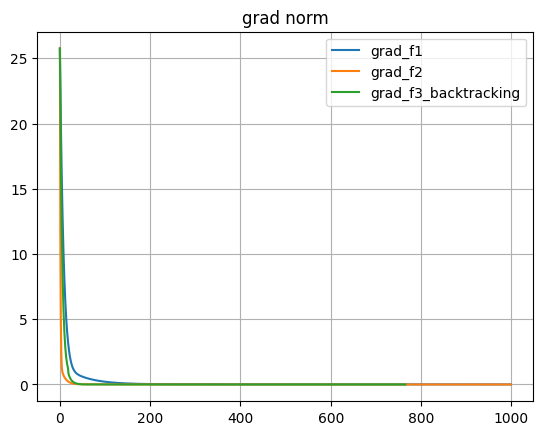

The computed solution is [0.98156087 0.99077332 1.00013966 1.00858942 1.01385129 1.01122924
 0.9916761  0.9991386 ] with k = 999
The computed solution is [0.99212825 0.9971962  1.00185943 1.0053135  1.00620039 1.0025498
 0.99336208 1.00092903] with k = 999
The computed solution is [0.99716681 0.99961242 1.00144018 1.00214622 1.00119635 0.99877226
 0.99943342 1.0001421 ] with k = 410


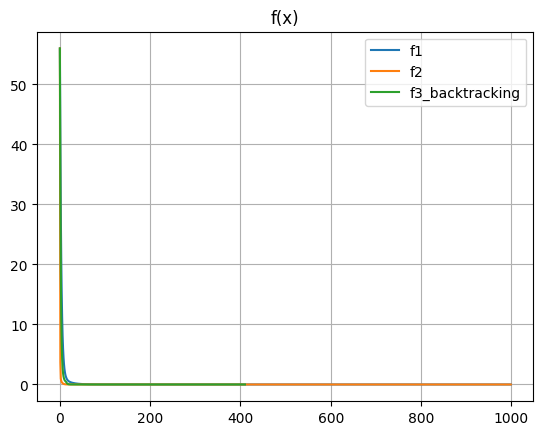

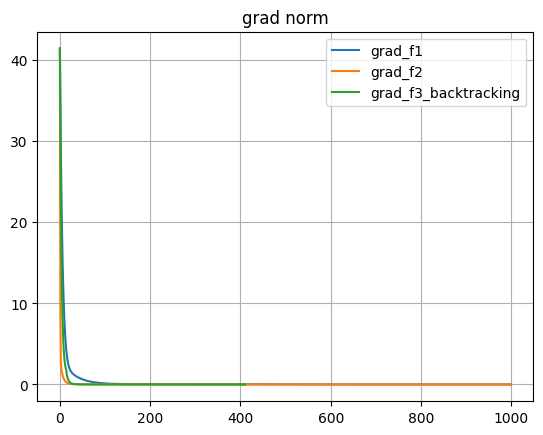

In [7]:
def f(x):
    return 0.5 * np.linalg.norm(A @ x - b, 2)**2

def grad_f(x):
    return np.linalg.norm(A @ x - b, 2) * A.T @ (A @ x - b) / np.linalg.norm(A @ x - b, 2) 

n_val = [2, 4, 6, 8]

for n in n_val:
    x0 = np.zeros((n,))
    A = np.vander(np.linspace(0, 1, n), n)
    b = A  @ np.ones(n)

    x_sol, k, f_val, grad_norm = GD(f, grad_f, x0, alpha=0.01)
    print(f'The computed solution is {x_sol} with k = {k}')

    x_sol2, k2, f_val2, grad_norm2 = GD(f, grad_f, x0, alpha=0.05)
    print(f'The computed solution is {x_sol2} with k = {k2}')

    x_sol3, k3, f_val3, grad_norm3 = GD_backtracking(f, grad_f, x0)
    print(f'The computed solution is {x_sol3} with k = {k3}')

    # plot f_val and grad_norm

    plt.plot(f_val)
    plt.plot(f_val2)
    plt.plot(f_val3)
    plt.title("f(x)")
    plt.legend(['f1', 'f2', 'f3_backtracking'])
    plt.grid()
    plt.show()

    plt.plot(grad_norm)
    plt.plot(grad_norm2)
    plt.plot(grad_norm3)
    plt.title("grad norm")
    plt.legend(['grad_f1', 'grad_f2', 'grad_f3_backtracking'])
    plt.grid()
    plt.show()

The computed solution is [0.97234896 0.99124237 1.01228569 1.02747179 0.99187259] with k = 999
The computed solution is [0.99446147 1.00207953 1.0063719  0.9968336  1.00007279] with k = 999
The computed solution is [0.99505898 1.00214716 1.00595291 0.99655441 1.0001911 ] with k = 350


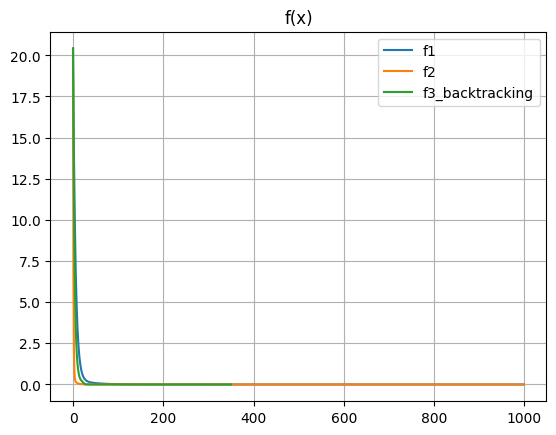

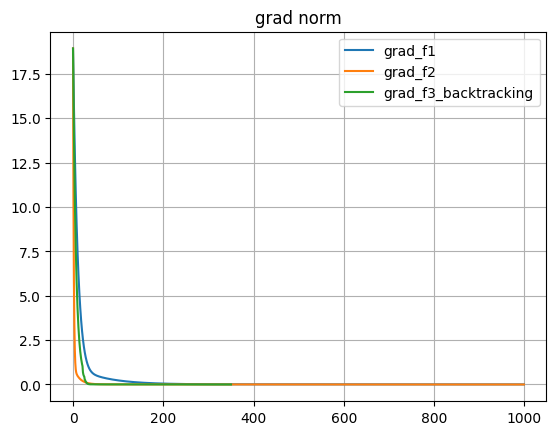

The computed solution is [0.93467036 0.95990606 0.99148859 1.02561746 1.00090027] with k = 999
The computed solution is [0.93870215 0.96193693 0.99047379 1.01989877 1.00242112] with k = 630
The computed solution is [0.9387067  0.96193942 0.99047299 1.01989242 1.00242315] with k = 164


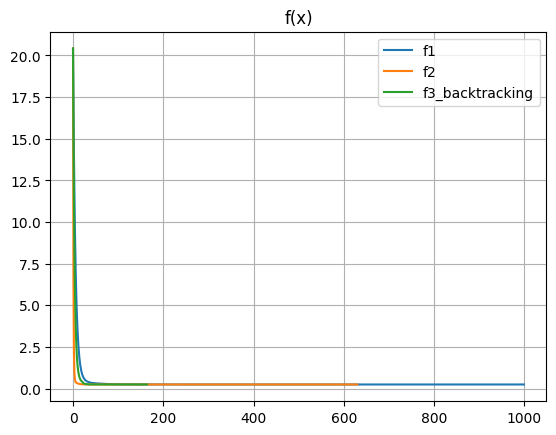

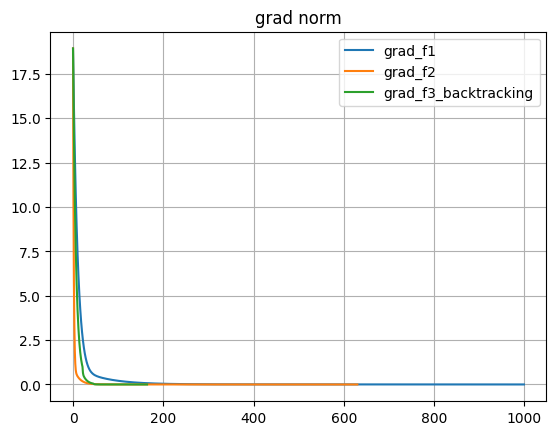

The computed solution is [0.83588338 0.86987121 0.9172046  0.98294852 1.02329432] with k = 786
The computed solution is [0.83595484 0.86990762 0.91718711 0.98284623 1.02332142] with k = 209
The computed solution is [0.83595701 0.86990873 0.91718658 0.98284311 1.02332225] with k = 89


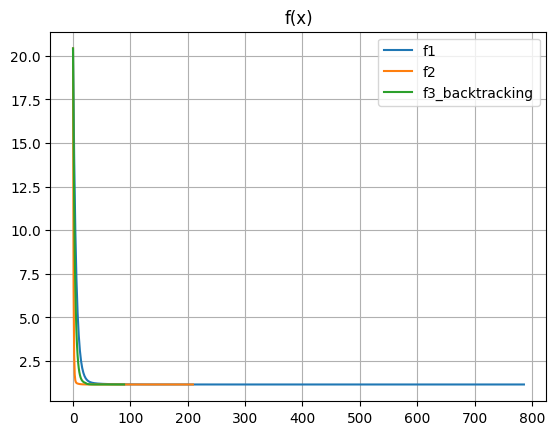

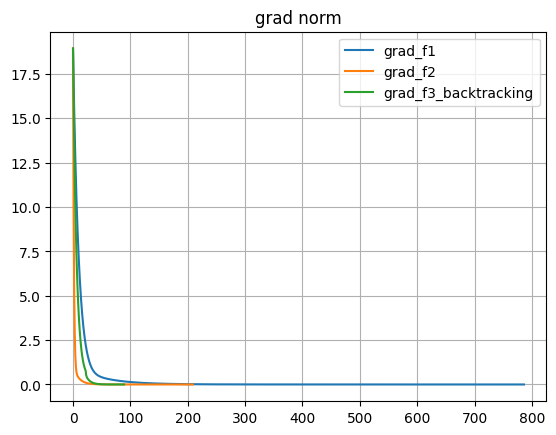

The computed solution is [0.75599545 0.79213577 0.84453066 0.92335952 1.02421648] with k = 430
The computed solution is [0.7560363  0.7921579  0.84452377 0.9233063  1.02422634] with k = 113
The computed solution is [0.75603811 0.79215884 0.84452337 0.92330377 1.02422696] with k = 75


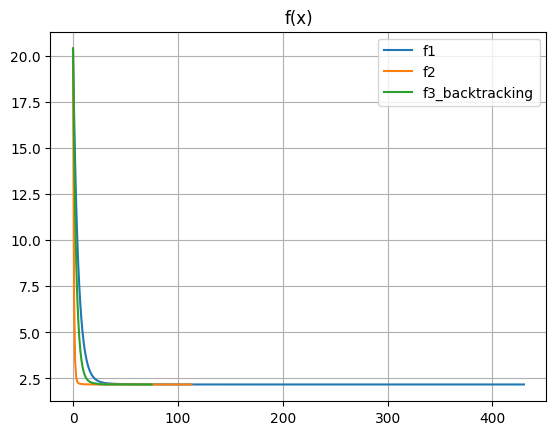

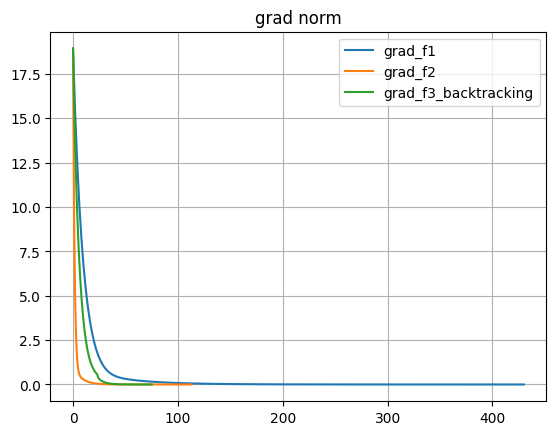

In [8]:
def f(x):
    return 0.5 * np.linalg.norm(A @ x - b, 2)**2 + 0.5 * l * np.linalg.norm(x, 2)**2

def grad_f(x):
    return A.T @ (A @ x - b) + l * x 

l_val = [0, 0.1, 0.5, 1.0]

for l in l_val:
    x0 = np.zeros((5,))
    A = np.vander(np.linspace(0, 1, 5), 5)
    b = A  @ np.ones(5)

    x_sol, k, f_val, grad_norm = GD(f, grad_f, x0, alpha=0.01)
    print(f'The computed solution is {x_sol} with k = {k}')

    x_sol2, k2, f_val2, grad_norm2 = GD(f, grad_f, x0, alpha=0.05)
    print(f'The computed solution is {x_sol2} with k = {k2}')

    x_sol3, k3, f_val3, grad_norm3 = GD_backtracking(f, grad_f, x0)
    print(f'The computed solution is {x_sol3} with k = {k3}')

    # plot f_val and grad_norm

    plt.plot(f_val)
    plt.plot(f_val2)
    plt.plot(f_val3)
    plt.title("f(x)")
    plt.legend(['f1', 'f2', 'f3_backtracking'])
    plt.grid()
    plt.show()

    plt.plot(grad_norm)
    plt.plot(grad_norm2)
    plt.plot(grad_norm3)
    plt.title("grad norm")
    plt.legend(['grad_f1', 'grad_f2', 'grad_f3_backtracking'])
    plt.grid()
    plt.show()

In [9]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * grad_f(x) ** 2:
        alpha = tau * alpha
    return alpha

def GD_backtracking2(f, grad_f, x0, maxit=1000, tolf=1e-6, tolx=1e-6):
    # initialize the infos
    f_val = np.zeros((maxit+1,))
    grad_norm = np.zeros((maxit+1,))

    # set the values for infos for x0
    f_val[0] = f(x0)
    grad_norm[0] = np.linalg.norm(grad_f(x0))
    xk = x0
    for k in range(maxit):
        alpha = backtracking(f, grad_f, xk)
        x = xk - alpha * grad_f(xk)

        # Update the infos
        f_val[k+1] = f(x)
        grad_norm[k+1] = np.linalg.norm(grad_f(x))

        if grad_norm[k+1] <= tolf * grad_norm[0] or np.linalg.norm(x - xk) <= tolx:
            break
        xk = x
    
    # cut off exceeding values
    f_val = f_val[:k+1]
    grad_norm = grad_norm[:k+1]

    return x, k, f_val, grad_norm

The x0 value = 0.0
The computed solution is 0.922218 with k = 112 with alpha = 0.01
The computed solution is 0.922224 with k = 20 with alpha = 0.05
The computed solution is 0.922221 with k = 58 with backtracking
The computed solution is 0.922210 with k = 218 with alpha = 0.005


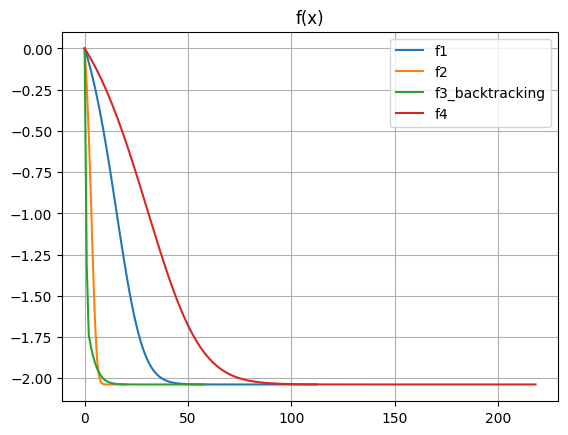

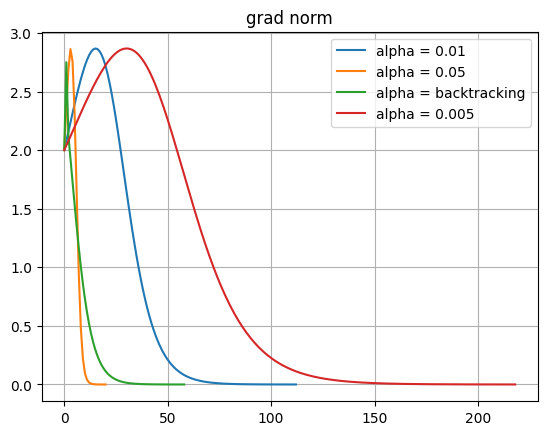

The x0 value = 0.01
The computed solution is 0.922218 with k = 112 with alpha = 0.01
The computed solution is 0.922224 with k = 20 with alpha = 0.05
The computed solution is 0.922221 with k = 57 with backtracking
The computed solution is 0.922210 with k = 217 with alpha = 0.005


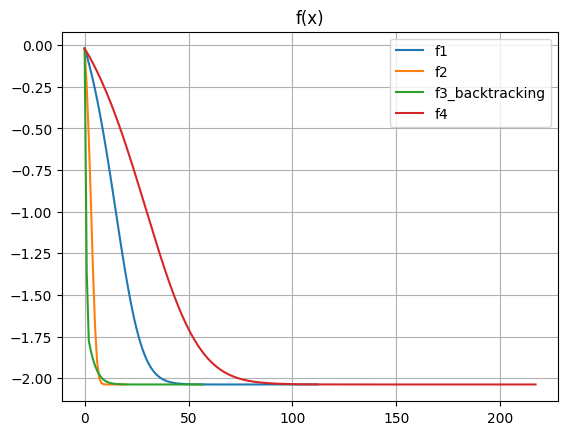

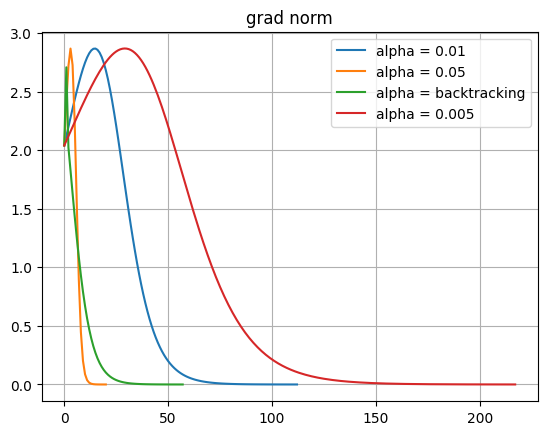

The x0 value = 0.5
The computed solution is 0.922218 with k = 93 with alpha = 0.01
The computed solution is 0.922224 with k = 16 with alpha = 0.05
The computed solution is 0.922221 with k = 57 with backtracking
The computed solution is 0.922209 with k = 179 with alpha = 0.005


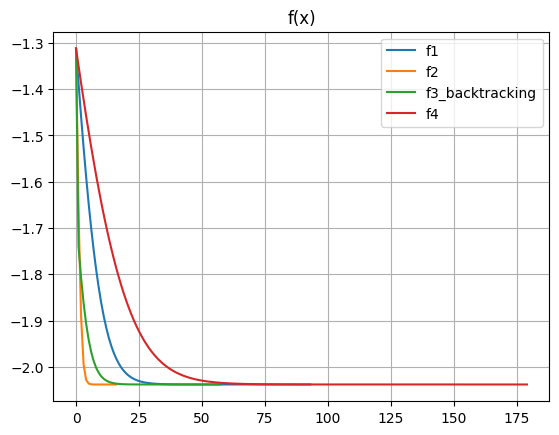

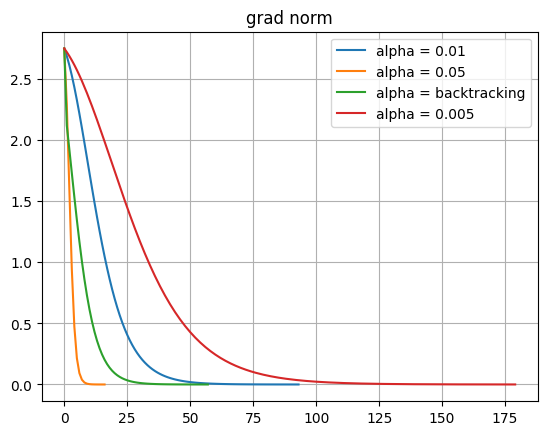

The x0 value = 0.8
The computed solution is 0.922218 with k = 79 with alpha = 0.01
The computed solution is 0.922224 with k = 14 with alpha = 0.05
The computed solution is 0.922221 with k = 51 with backtracking
The computed solution is 0.922209 with k = 150 with alpha = 0.005


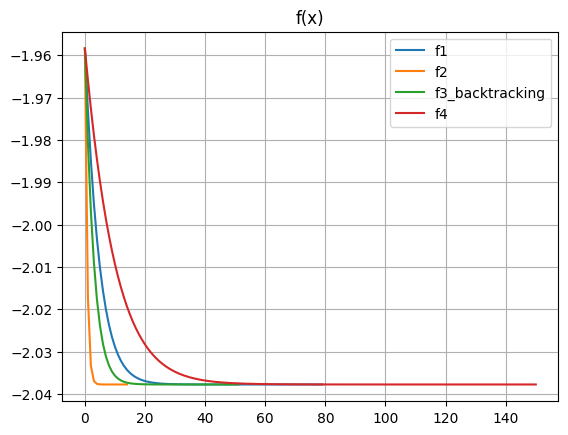

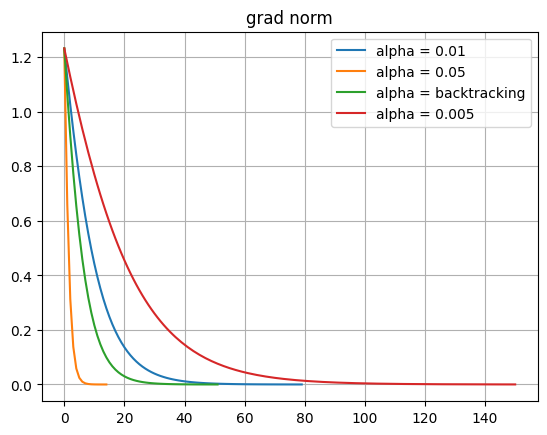

In [10]:
def f(x):

    return x**4 + x**3 - 2*x**2 - 2*x

def grad_f(x):

    return 4*x**3 + 3*x**2 - 4*x - 2

x0_val = [0.0, 0.01, 0.5, 0.8]

for x0 in x0_val:
    print(f'The x0 value = {x0}')
    x_sol, k, f_val, grad_norm = GD(f, grad_f, x0, alpha=0.01)
    print(f'The computed solution is {x_sol:0.6f} with k = {k} with alpha = 0.01')

    x_sol2, k2, f_val2, grad_norm2 = GD(f, grad_f, x0, alpha=0.05)
    print(f'The computed solution is {x_sol2:0.6f} with k = {k2} with alpha = 0.05')

    x_sol3, k3, f_val3, grad_norm3 = GD_backtracking2(f, grad_f, x0)
    print(f'The computed solution is {x_sol3:0.6f} with k = {k3} with backtracking')

    x_sol4, k4, f_val4, grad_norm4 = GD(f, grad_f, x0, alpha=0.005)
    print(f'The computed solution is {x_sol4:0.6f} with k = {k4} with alpha = 0.005')

    # plot f_val and grad_norm

    plt.plot(f_val)
    plt.plot(f_val2)
    plt.plot(f_val3)
    plt.plot(f_val4)
    plt.title("f(x)")
    plt.legend(['f1', 'f2', 'f3_backtracking', 'f4'])
    plt.grid()
    plt.show()

    plt.plot(grad_norm)
    plt.plot(grad_norm2)
    plt.plot(grad_norm3)
    plt.plot(grad_norm4)
    plt.title("grad norm")
    plt.legend(['alpha = 0.01', 'alpha = 0.05', 'alpha = backtracking', 'alpha = 0.005'])
    plt.grid()
    plt.show()